# Projet CISD IS329 2022-2023 : Auto Encodeurs

## Inscriptions soutenance
https://docs.google.com/spreadsheets/d/1kclPhfhaOOBojEOy2NTwxtT-19CCkBjJ5_hR8L0_pHI/edit?usp=sharing

```
 Idée farfelue : Implémenter un autoencoder pour encoder des autos 
```

![https://ai.stanford.edu/~jkrause/cars/car_dataset.html](cars.png)

On va travailler sur 100 photos de voitures récupérées d'un dataset public. 

Le but de ce projet est d'utiliser des réseaux de neurones pour compresser ces images.

On va procéder en 3 étapes :
 - Création d'une baseline : Compression sans réseau de neurones
 - Création d'un modèle Deep Learning : Compression avec un auto-encodeur
 - Améliorations !

## Déroulé du projet
 - Formez des binomes : A me communiquer lors du TP du 19 janvier.
 - Réalisez le projet en complétant à minima ce notebook : Notebook à me fournir le jour de la soutenance le 26 janvier.
 - Préparez des slides pour une présentation de 10min : 
   - Présentez la démarche que vous avez utilisé pour résoudre le problème
   - Présentez les différentes techniques utilisées dans votre projet en justifiant vos choix
   - Il peut être intéressant d'évoquer des pistes que vous avez exploré et qui n'ont pas marché

## Les critères de notation

3 points seront pris en compte pour la notation du projet : 
- La documentation/les commentaires du code/notebook que vous restituez
- Votre prestation sur la présentation le jour de la soutenance
- Les pistes supplémentaires explorées en ouverture du projet


## Entrée en matière : Baseline
### Compression d'images à base de [SVD](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res)

Nos images (dans le répertoire cars_sample) sont composées de 3 canaux de couleurs (RGB). Chaque canal peut être représenté par une matrice que l'on peut décomposer comme suit : 
$$M=U\Sigma V^{*}\,\!$$

Dans la pratique on va stacker les 3 canaux pour obtenir une matrice M de taille $m$ x $3n$ pour une image de taille $m$ x $n$.

La matrice $\Sigma$ a ses coefficients diagonnaux réels positifs ou nuls, ce sont les valeurs singulières, et ses coefficients extra diagonnaux nuls. On considère de plus que les valeurs singulières sont décroissantes $\Sigma_{ii} > \Sigma_{jj}$ si $i < j$.

Notons 
$$M^{k}=U\Sigma^{k} V^{*}\,\!$$

Avec $\Sigma^{k}$ la matrice telle que $\Sigma^{k}_{ii} = \Sigma_{ii}$ pour tout $i <= k$, le reste de ses coefficients étants nuls.

Question :
A l'aide des bibliothèques scientifiques python (scipy) calculez la décomposition SVD.

In [1]:
from scipy.linalg import svd
import numpy as np

# U, Σ, V = svd(x)

Affichage d'une image

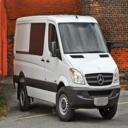

In [2]:
import glob
import random
from PIL import Image

image_name = random.choice(glob.glob("cars_sample/*"))
img = Image.open(image_name)
img

Définissez une fonction qui prend en entrée une image, calcule la décomposition SVD de l'image

In [3]:
def computeImageSVD(img):

    # get Image matrix
    img = np.concatenate(img.split(), axis=1)
    imageArray = np.array(img)

    # compute the SVD
    U, Σ, V = svd(imageArray)

    return (U, Σ, V)

Définissez une fonction qui prend en entrée une image et un entier k, calcule la décomposition SVD de l'image et retourne l'approximation $M^{k}$ de cette décomposition

In [4]:
def computeImageSVD_k(img, k):
    U, Σ, V = computeImageSVD(img)
    Σk = Σ[:k]
    Σk = np.concatenate((Σk, [0] * (len(Σ) - len(Σk))))
    print(U.shape)
    print(Σk.shape)
    print(V.shape)
    return (U, Σk, V)

Affichez moi des belles images avant et après compression, avec différents niveaux de compression (faites varier $k$)

(128, 128)
(128,)
(384, 384)


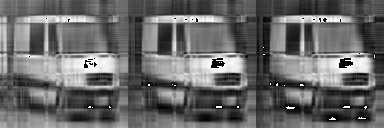

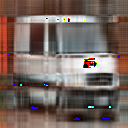

-0.39723936
0.8454644


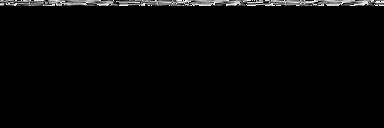

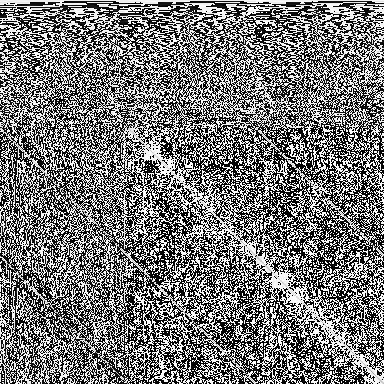

(128, 128)
(128,)
(384, 384)


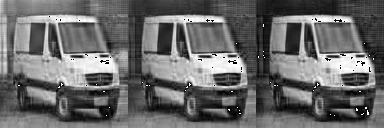

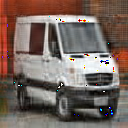

-0.39723936
0.8454644


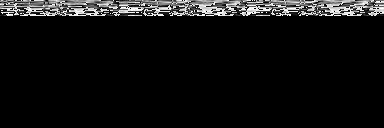

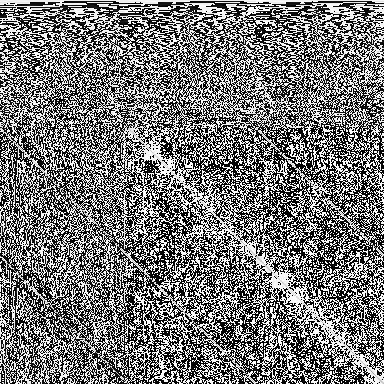

(128, 128)
(128,)
(384, 384)


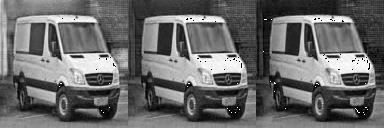

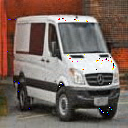

-0.39723936
0.8454644


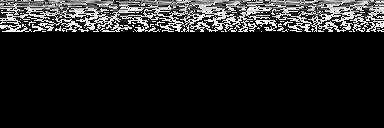

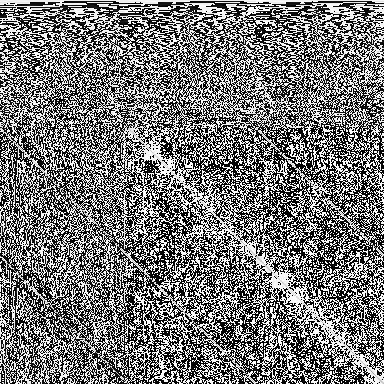

(128, 128)
(128,)
(384, 384)


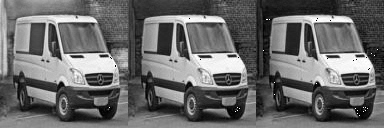

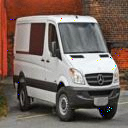

-0.39723936
0.8454644


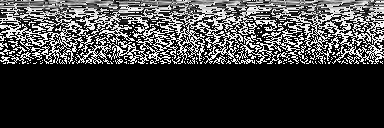

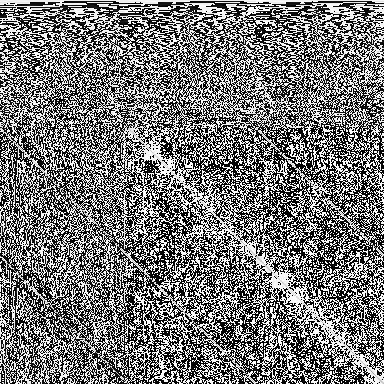

(128, 128)
(128,)
(384, 384)


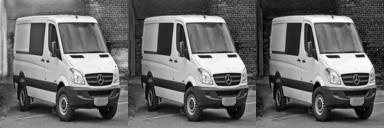

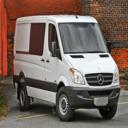

-0.39723936
0.8454644


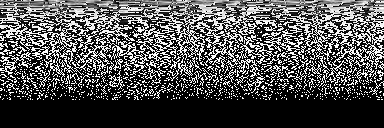

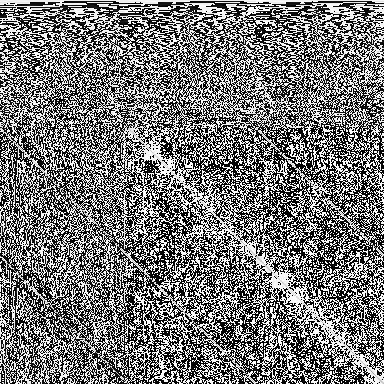

(128, 128)
(128,)
(384, 384)


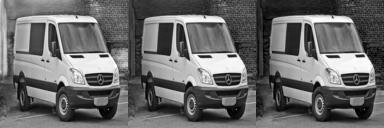

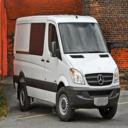

-0.39723936
0.8454644


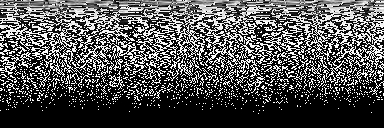

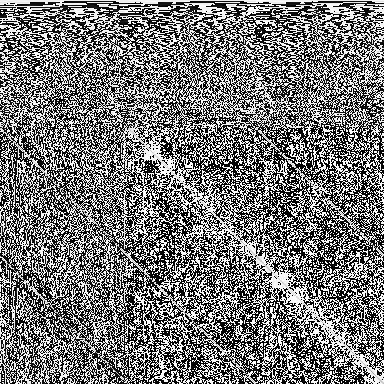

In [5]:
def displayComputeSVD(img, k):
    U, Σk, V = computeImageSVD_k(img, k)
    Σ = np.diag(Σk)
    Σe = np.pad(Σ, [(0, U.shape[0] - Σ.shape[0]), (0, V.shape[1] - Σ.shape[1])], mode="constant")

    imageArray = np.dot(U, np.dot(Σe, V))
    imageTensor = np.dstack(np.split(imageArray, 3, axis=1))
    display(Image.fromarray(np.uint8(imageArray)))
    display(Image.fromarray(np.uint8(imageTensor)))
    # display(Image.fromarray(np.uint8(U * 255.0/U.max())))
    print(V.min())
    print(V.max())
    display(Image.fromarray(np.uint8(np.dot(Σe, V) * 255.0/np.dot(Σe, V).max())))
    display(Image.fromarray(np.uint8(V * 255.0/V.max())))


for k in [6, 16, 32, 64, 100, 128]:
  displayComputeSVD(img, k)

On considère que les images initiales sont stockées sous forme de tableaux d'entiers qui représentent tous les pixels de l'image.
 - Quel espace mémoire prend 1 image RGB de taille 128x128 ?

On calcule la décomposition de cette image en utilisant la SVD tronquée, avec k = 64.
 - Comment stockez-vous l'image approximée?
 - Quel espace mémoire prend cette image ?
 - Quel niveau de compression obtenez vous ? (y en a t'il?)

In [6]:
print("RGB image espace mémoire :", img.size[0] * img.size[1] * 3)

print("on stock les partie qui ne devienne pas null après le produit avec sigma")
print("version avec Vt linge + column")
k = 100
es = (384*k + 384*k - k*k)+128*k+k
print("Ce qui donne comme espace mémoire pour un k=100:", es)
k = 8
es = (384*k + 384*k - k*k)+128*k+k
print("et pour un k=8:", es)
k = 64
es = (384*k + 384*k - k*k)+128*k+k
print("et pour un k=64:", es)
k = 128
es = (384*k + 384*k - k*k)+128*k+k
print("et pour un k=128:", es)

print("version avec Vt.dot(sigma)")
k=100
es=384*k+128*k #+k pas besoin de k car sigma est utilisé que avec V donc dans (384 * k)
print("Ce qui donne comme espace mémoire pour un k=100:", es)
k=8
es=384*k+128*k
print("et pour un k=8:", es)
k=64
es = 384*k+128*k
print("et pour un k=64:", es)
k=128
es=384*k+128*k
print("et pour un k=128:", es)

# WARN: float between 1 and -1

RGB image espace mémoire : 49152
on stock les partie qui ne devienne pas null après le produit avec sigma
version avec Vt linge + column
Ce qui donne comme espace mémoire pour un k=100: 79700
et pour un k=8: 7112
et pour un k=64: 53312
et pour un k=128: 98432
version avec Vt.dot(sigma)
Ce qui donne comme espace mémoire pour un k=100: 51200
et pour un k=8: 4096
et pour un k=64: 32768
et pour un k=128: 65536


## Compression par autoencodeur

On a vu les autoencodeurs dans le TP5, réutilisez ce type d'architecture. Apprenez votre modèle sur le jeu d'images 'car_sample'.

In [7]:
import torch
from torch import nn
from torchvision import transforms

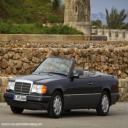

In [8]:
carImgDataset = [Image.open(f) for f in glob.glob("cars_sample/*")]

carImgDataset[0]

In [9]:
carImgTensorDataset = [transforms.ToTensor()(i) for i in carImgDataset]
carImgTensorDataset[0]

tensor([[[0.1804, 0.2039, 0.2314,  ..., 0.4902, 0.4863, 0.4863],
         [0.1882, 0.2039, 0.2353,  ..., 0.4980, 0.4941, 0.4941],
         [0.1961, 0.2078, 0.2275,  ..., 0.5059, 0.5020, 0.5020],
         ...,
         [0.5373, 0.5922, 0.6314,  ..., 0.5608, 0.5569, 0.5569],
         [0.5686, 0.5765, 0.5804,  ..., 0.5608, 0.5569, 0.5569],
         [0.5569, 0.5451, 0.5490,  ..., 0.5608, 0.5608, 0.5569]],

        [[0.1725, 0.1961, 0.2235,  ..., 0.5333, 0.5294, 0.5294],
         [0.1804, 0.1961, 0.2275,  ..., 0.5412, 0.5373, 0.5373],
         [0.1804, 0.1922, 0.2235,  ..., 0.5490, 0.5451, 0.5451],
         ...,
         [0.5137, 0.5686, 0.6078,  ..., 0.5333, 0.5294, 0.5294],
         [0.5451, 0.5529, 0.5569,  ..., 0.5333, 0.5294, 0.5294],
         [0.5333, 0.5216, 0.5255,  ..., 0.5333, 0.5333, 0.5294]],

        [[0.0745, 0.0980, 0.1255,  ..., 0.6039, 0.6000, 0.6000],
         [0.0824, 0.0980, 0.1294,  ..., 0.6118, 0.6078, 0.6078],
         [0.0745, 0.0863, 0.1137,  ..., 0.6275, 0.6235, 0.

In [10]:
class Encoder(nn.Module):
    def __init__(self, vector_size = None):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        return x

class Decoder(nn.Module):
    def __init__(self, vector_size = None):
        super(Decoder, self).__init__()
        self.tconv1 = nn.ConvTranspose2d(8, 16, kernel_size=2, stride=2)
        self.relu1 = nn.ReLU()
        self.tconv2 = nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.tconv1(x)
        x = self.relu1(x)
        x = self.tconv2(x)
        x = self.sigmoid(x)
        return x

In [11]:
def imgToDataArray(img):
    img = np.concatenate(img.split(), axis=1)
    imageArray = np.array(img)
    return imageArray

def dataArrayToImg(imageArray):
    return Image.fromarray(np.uint8(imageArray))

def dataArrayToColorImg(imageArray):
    imageTensor = np.dstack(np.split(imageArray, 3, axis=1))
    return Image.fromarray(np.uint8(imageTensor))

In [16]:
from math import log2
import torch.optim as optim

encoder = Encoder()
decoder = Decoder()
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()))
loss = torch.nn.MSELoss()

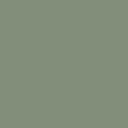

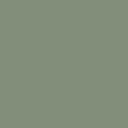

In [17]:
with torch.no_grad():
    z = encoder(carImgTensorDataset[0])
    output = decoder(z)
    output = output.transpose(0, 2).transpose(0, 1).detach().numpy()
    display(Image.fromarray(np.uint8(output*255)))
    display(dataArrayToImg(output*255))

0 7.492418548092246
torch.Size([8, 32, 32])
error=tensor(0.0527)


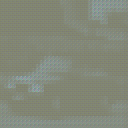

1 4.342933818697929
torch.Size([8, 32, 32])
error=tensor(0.0219)


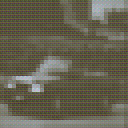

3 1.5288887079805136
torch.Size([8, 32, 32])
error=tensor(0.0128)


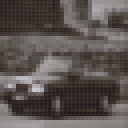

7 1.2063468364067376
torch.Size([8, 32, 32])
error=tensor(0.0101)


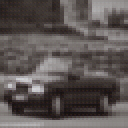

15 1.0302846357226372
torch.Size([8, 32, 32])
error=tensor(0.0085)


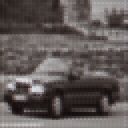

31 0.6313691742252558
torch.Size([8, 32, 32])
error=tensor(0.0061)


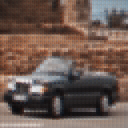

63 0.47637304314412177
torch.Size([8, 32, 32])
error=tensor(0.0050)


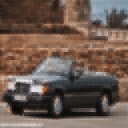

127 0.4006363869411871
torch.Size([8, 32, 32])
error=tensor(0.0043)


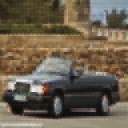

255 0.3713869395432994
torch.Size([8, 32, 32])
error=tensor(0.0041)


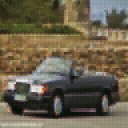

511 0.35004077351186424
torch.Size([8, 32, 32])
error=tensor(0.0039)


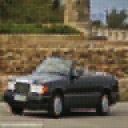

tensor(0.0052, grad_fn=<MseLossBackward0>)

In [18]:
epoch_errors = []
for epoch in range(1000):
    epoch_error = 0
    for input in carImgTensorDataset[1::]:
        # On annule les gradients
        optimizer.zero_grad()
        # On fait la forward-pass
        z = encoder(input)
        output = decoder(z)
        # On calcule la loss associée
        loss_value = loss(output, input)
        # On calcule les gradients
        loss_value.backward()
        # On indique à l'optimiser de faire son travail => Mise a jour du réseau ici
        optimizer.step()
        epoch_error += float(loss_value)
    if int(log2(epoch+1)) == log2(epoch+1):
        print(epoch, epoch_error)
        input = carImgTensorDataset[0]
        with torch.no_grad():
            z = encoder(input)
            print(z.shape)
            output = decoder(z)
            error = loss(output, input)
            print(f"{error=}")
            # print(output.transpose(0, 2).transpose(0, 1).numpy().shape)
            outputNp = output.transpose(0, 2).transpose(0, 1).numpy()
            # display(Image.fromarray(np.uint8(outputNp*255)))
            display(dataArrayToImg(outputNp*255))
    epoch_errors.append(epoch_error)
    if epoch_error < 1e-5:
        break
loss_value

Mesurez la convergence?

Quelle est la qualité des résultats (affichez les images)

- Quels éléments vous avez besoin de stocker pour sauvegarder les images compressées?
- Quel espace disque est nécessaire pour stocker les 100 images ?
- Quel niveau de compression obtenez vous ?
- Comparez à la SVD 

## Idées d'améliorations :
- Tester d'autres types d'architectures : Est-ce que ce sont les autoencodeurs les architectures les plus adaptées à la compression ?
- Est-ce que l'on peut obtenir les mêmes résultats avec un réseau plus petit ? : Ce principe s'appelle "distillation" sur les réseaux de neurones.
- ...